In [2]:
import yt
import numpy as np
import matplotlib.pyplot as plt

In [19]:
ds = yt.load("nonlin2_amr_0020.dat", unit_system="code")

yt : [INFO     ] 2022-06-07 12:09:30,147 Parameters: current_time              = 0.009999999999999988
yt : [INFO     ] 2022-06-07 12:09:30,150 Parameters: domain_dimensions         = [256 256   1]
yt : [INFO     ] 2022-06-07 12:09:30,153 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-07 12:09:30,159 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-06-07 12:09:30,162 Parameters: cosmological_simulation   = 0


yt : [WARNING  ] 2022-06-07 12:09:32,422 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2022-06-07 12:09:35,077 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-06-07 12:09:35,080 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-06-07 12:09:35,083 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-06-07 12:09:35,085 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-06-07 12:09:35,087 Making a fixed resolution buffer of (('amrvac', 'u')) 800 by 800



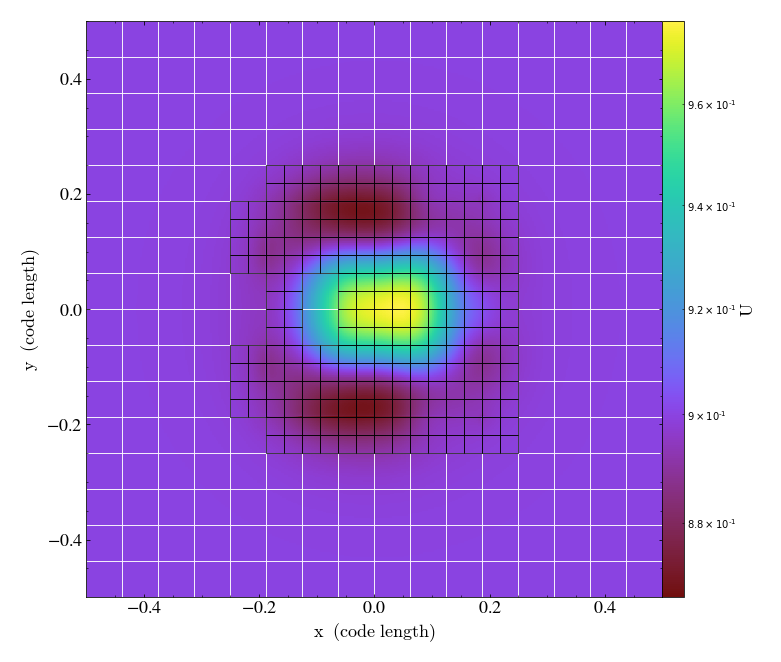

In [20]:
#ds.covering_grid() #Data in matrix uit dat file halen
p=yt.plot_2d(ds,"u")
#p.annotate_cell_edges()
p.annotate_grids()
p.show()

In [48]:
field = ("u")  # The field to average
weight = ("u")  # The weight for the average

ad = ds.all_data()  # This is a region describing the entire box,
# but note it doesn't read anything in yet!

# We now use our 'quantities' call to get the average quantity
average_value = ad.quantities.weighted_average_quantity(field, weight)

print("Average %s (weighted by %s) is %0.3e %s" % (field, weight, average_value, average_value.units))

#print(
#    "Average %s (weighted by %s) is %0.3e %s"
#    % (field[1], weight[1], average_value, average_value.units)
#)

Average u (weighted by u) is 9.001e-01 dimensionless


In [121]:
# Say we interpolate to AMR level 1
level = 0
rawdata = ds.covering_grid(level, left_edge=ds.domain_left_edge, 
                          dims=ds.domain_dimensions * ds.refine_by**level)['u']

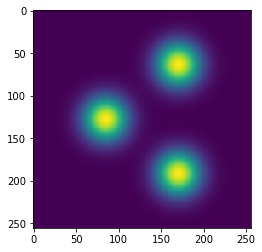

In [122]:
# now you can for instance create a matplotlib figure and plot the data, or do other stuff with it
fig, ax = plt.subplots(1)
density = rawdata[:, :, 0].value
# rotate 90 degrees counterclockwise due to imshow's convention of the origin (top-left)
ax.imshow(np.rot90(np.log10(density)))  
plt.show()

In [126]:
print(rawdata[:, :, 0].value)

#rho_l4[:, :, 0].value
#sum(rho_l4[:, :, 0].value)
#sum((rho_l4[:, :, 0].value)**2)

[[0.9 0.9 0.9 ... 0.9 0.9 0.9]
 [0.9 0.9 0.9 ... 0.9 0.9 0.9]
 [0.9 0.9 0.9 ... 0.9 0.9 0.9]
 ...
 [0.9 0.9 0.9 ... 0.9 0.9 0.9]
 [0.9 0.9 0.9 ... 0.9 0.9 0.9]
 [0.9 0.9 0.9 ... 0.9 0.9 0.9]]


In [94]:
ad = ds.all_data()
print(ad.sum(("u")))
print(f"{ad.max_level=}, {ad.min_level=}")
ad.max_level = ad.min_level = 2
print(f"{ad.max_level=}, {ad.min_level=}")
print(ad.sum(("u")))

58988.57577856904 dimensionless
ad.max_level=0, ad.min_level=0
ad.max_level=2, ad.min_level=2
0.0 dimensionless
